In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

In [8]:
X_train[0].shape

(28, 28)

In [9]:
len(X_train)

60000

In [10]:
len(X_test)

10000

In [13]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

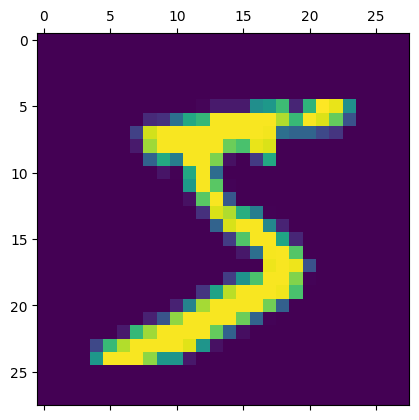

In [14]:
plt.matshow(X_train[0])

In [30]:
X_train = X_train/255
X_test = X_test/255

In [31]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)


In [32]:
model = keras.Sequential([keras.layers.Dense(10,input_shape = (784,),activation = "sigmoid")
                         ])
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

model.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4633 - accuracy: 0.8789
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3034 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2829 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2733 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9264


In [33]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2660 - accuracy: 0.9258


[0.2659700810909271, 0.9258000254631042]

313/313 [==============================] - 0s 1ms/step


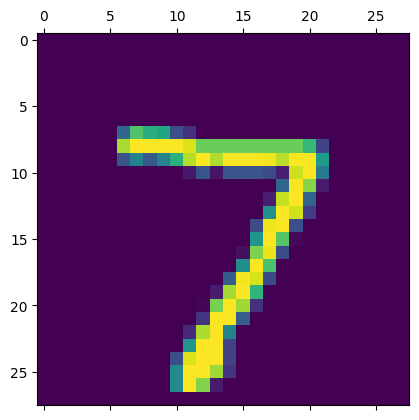

In [38]:
y_predicted = model.predict(X_test_flattened)
plt.matshow(X_test[0])

In [37]:
y_predicted[0]
np.argmax(y_predicted[0])

7

313/313 [==============================] - 0s 1ms/step


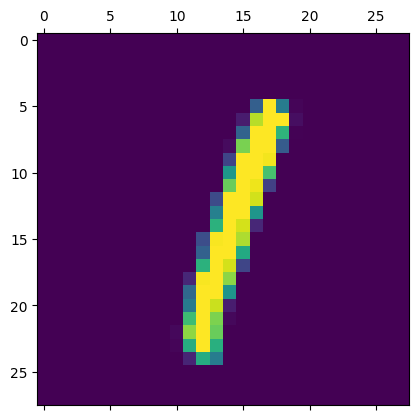

In [39]:
y_predicted = model.predict(X_test_flattened)
plt.matshow(X_test[5])

In [40]:
np.argmax(y_predicted[5])

1

In [41]:
y_predicted_labels = [ np.argmax(i) for i in y_predicted]

In [42]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [45]:
cm = tf.math.confusion_matrix(labels = Y_test,predictions =y_predicted_labels)
cm
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel("PREDICTION")
plt.ylabel("TRUTH")

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    6,    4,    2,    2,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   5,    7,  927,   17,    8,    4,   12,   10,   38,    4],
       [   4,    0,   20,  919,    0,   31,    2,   10,   17,    7],
       [   2,    1,    3,    2,  913,    0,   10,    4,   10,   37],
       [   8,    2,    5,   27,    7,  795,   11,    4,   28,    5],
       [  13,    3,    7,    1,    7,   19,  904,    2,    2,    0],
       [   1,    6,   24,   10,    9,    1,    0,  937,    3,   37],
       [   6,    9,    7,   25,    9,   33,    9,    8,  860,    8],
       [  11,    7,    1,   11,   25,    8,    0,   16,    7,  923]])>

Text(95.72222222222221, 0.5, 'TRUTH')

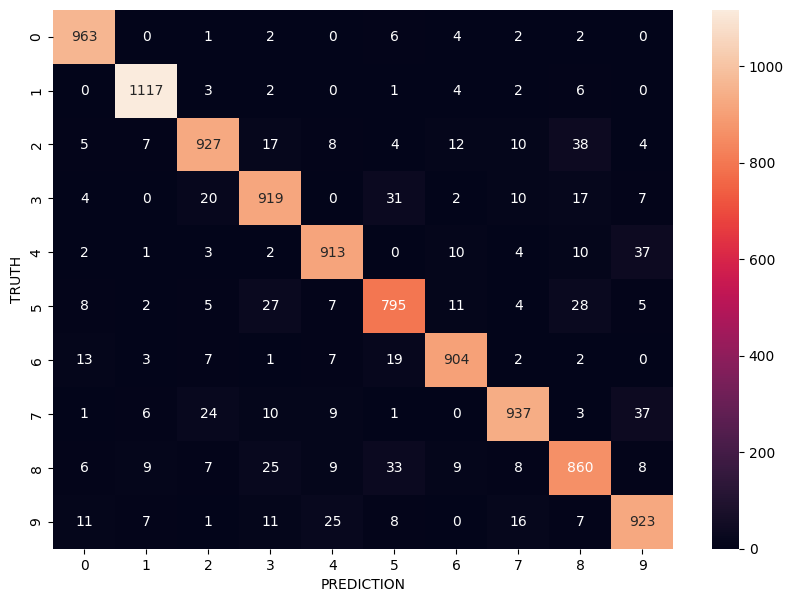

In [49]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel("PREDICTION")
plt.ylabel("TRUTH")

In [57]:
model = keras.Sequential([
    keras.layers.Dense(1000,input_shape = (784,),activation = "relu"),
    keras.layers.Dense(100,activation = "relu"),
    keras.layers.Dense(10,activation = "sigmoid")
    
                         ])
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

model.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1843 - accuracy: 0.9432
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0771 - accuracy: 0.9762
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0532 - accuracy: 0.9831
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0401 - accuracy: 0.9876
Epoch 5/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0315 - accuracy: 0.9898


In [60]:
model.evaluate(X_test_flattened,Y_test)
y_predicted =  model.predict(X_test_flattened)
y_predicted_labels = [ np.argmax(i) for i in y_predicted]

313/313 [==============================] - 1s 4ms/step


Text(95.72222222222221, 0.5, 'TRUTH')

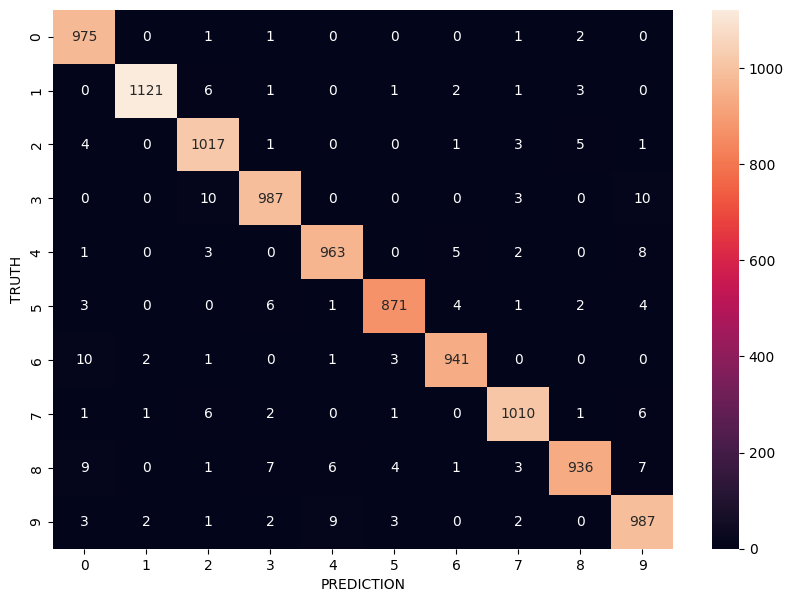

In [61]:
cm = tf.math.confusion_matrix(labels = Y_test,predictions =y_predicted_labels)
cm
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel("PREDICTION")
plt.ylabel("TRUTH")
